# **Imports**

In [1]:

'''
KNN model for classifying Normal and pneumonia patient using chest X-ray images.

'''
import numpy as np
import pandas as pd
import cv2
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib.image as image 
from sklearn import preprocessing, metrics
from google.colab.patches import cv2_imshow
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, accuracy_score, roc_curve


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
'''
Importing training and testing data
'''
train_file = open("/content/drive/MyDrive/ML Project/Extracted Train Features.pkl", "rb")
train_data = pickle.load(train_file)
train_file.close()

test_file = open("/content/drive/MyDrive/ML Project/Extracted Test Features.pkl", "rb")
test_data = pickle.load(test_file)
test_file.close()

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

train_features = train_df.loc[:,:train_data.shape[1]-2]
train_labels   = train_df.loc[:,train_data.shape[1]-1]

test_features = test_df.loc[:,:test_data.shape[1]-2]
test_labels   = test_df.loc[:,test_data.shape[1]-1]


# **Training**

In [3]:
'''
Training KNN model
'''
x_train,x_validation, y_train,y_validation = train_test_split(train_features, train_labels, test_size=0.30)


k = [8,9,10,11,12,13,14,15,16]
train_acc = []
validation_acc = []
for ele in k:
  print(ele)
  model = KNeighborsClassifier(n_neighbors=ele)
  model.fit(x_train,y_train)
  training_predictions   = model.predict(x_train)
  validation_predictions = model.predict(x_validation)

  train_acc.append(metrics.accuracy_score(y_train, training_predictions))
  validation_acc.append(metrics.accuracy_score(y_validation, validation_predictions))


8
9
10
11
12
13
14
15
16


# **Plotting**

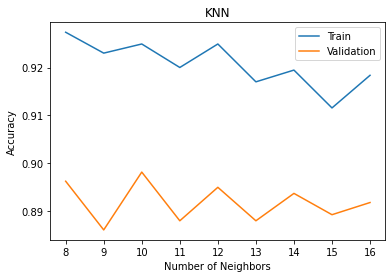

In [4]:
plt.plot(k,train_acc, label='Train')
plt.plot(k,validation_acc, label = "Validation" )
plt.legend()
plt.title("KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# **Testing**

In [5]:
model = KNeighborsClassifier(n_neighbors=10)
model.fit(x_train,y_train)

saved_model = open("/content/drive/MyDrive/ML Project/Knn model.pkl", "wb")
pickle.dump(model,saved_model)
saved_model.close()

In [6]:
test_predictions = model.predict(test_features)

mat = confusion_matrix(test_labels, test_predictions)
TN = mat[0][0]
TP = mat[1][1]
FN = mat[1][0]
FP = mat[0][1]
acc = (TN+TP)/(TN+TP+FN+FP)
recall = (TP)/(TP+FN)
specificity = (TN)/(TN+FP)




In [7]:

roc = roc_auc_score(test_labels, test_predictions)
training_predictions = model.predict(x_train)



print("Recall of test set:", recall)
print("Specificity of test set:", specificity)
print("Accuracy on test set:", acc)
print("ROC test set:", roc)
print("Accuracy of train set:", accuracy_score(y_train, training_predictions))

Recall of test set: 0.9358974358974359
Specificity of test set: 0.6239316239316239
Accuracy on test set: 0.8189102564102564
ROC test set: 0.7799145299145299
Accuracy of train set: 0.9249454148471615


In [15]:
print('KNN Classifier Model Classification Report', '\n', classification_report(test_labels, test_predictions, target_names = ['NORMAL (Class 0)','PNEUMONIA (Class 1)']))

KNN Classifier Model Classification Report 
                      precision    recall  f1-score   support

   NORMAL (Class 0)       0.85      0.62      0.72       234
PNEUMONIA (Class 1)       0.81      0.94      0.87       390

           accuracy                           0.82       624
          macro avg       0.83      0.78      0.79       624
       weighted avg       0.82      0.82      0.81       624



AUC score of test set: 0.7799145299145299


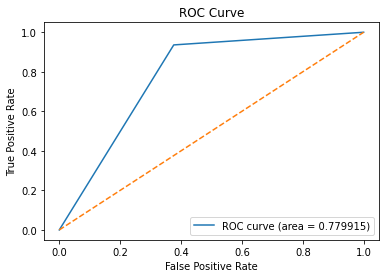

In [10]:
auc = roc_auc_score(test_labels, test_predictions)
print("AUC score of test set:", auc)
fpr, tpr, _ = roc_curve(test_labels,test_predictions)
plt.plot(fpr, tpr, label = 'ROC curve (area = %f)' % auc)
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc = "lower right")
plt.show()

In [13]:
!pip install --upgrade plotly==4.14.0
import plotly.express as plt2

def plot_cm(z, label_names):
    fig = plt2.imshow(z,
                     labels = dict(x = "Predicted", y = "Actual", color = "Productivity"),
                     x = label_names,
                     y = label_names,
                     width = 700)
    fig.update_layout(title = 'Confusion Matrix')
    fig.update_xaxes(side = "top")
    return fig

Requirement already up-to-date: plotly==4.14.0 in /usr/local/lib/python3.7/dist-packages (4.14.0)


In [14]:
plot_cm(mat, ['NORMAL (Class 0)','PNEUMONIA (Class 1)']).show()